Training Baseline SVM Models...
Linear Kernel Accuracy:  1.0
Linear Kernel Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      1.00      1.00      1387

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947

Polynomial Kernel Accuracy: 0.99830335934849
Polynomial Kernel Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      1.00      1.00      1387

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947

RBF Kernel Accuracy: 0.999660671869698
RBF Kernel Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.

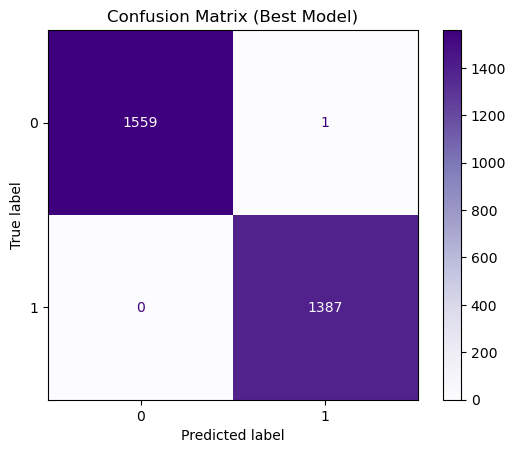

In [4]:
# Import necessary libraries 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
 
# Load the dataset from text files
def load_data():
# Load training data
    X_train = np.loadtxt("UCI_HAR_Dataset/UCI HAR Dataset/train/X_train.txt")
    y_train = np.loadtxt("UCI_HAR_Dataset/UCI HAR Dataset/train/y_train.txt")
    
# Load test data
    X_test = np.loadtxt("UCI_HAR_Dataset/UCI HAR Dataset/test/X_test.txt")
    y_test = np.loadtxt("UCI_HAR_Dataset/UCI HAR Dataset/test/y_test.txt")
    
    return X_train, y_train, X_test, y_test

# Normalize the features
def normalize_features(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

# Convert labels to binary (active vs. inactive)
#Convert the 6-class labels into binary labels (active vs. inactive).
#Active activities: WALKING (1), WALKING_UPSTAIRS (2), WALKING_DOWNSTAIRS (3).
# Inactive activities: SITTING (4), STANDING (5), LAYING (6).

def convert_to_binary(labels):
    active_labels = [1, 2, 3]  # WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS
    return np.array([1 if label in active_labels else 0 for label in labels]) #1 for active, 0 for inactive.

# Evaluate train SVM models' performances with different kernels
def train_baseline_models(X_train, y_train, X_test, y_test):
    
# Linear Kernel
    svm_linear = SVC(kernel='linear')
    svm_linear.fit(X_train, y_train)
    y_pred_linear = svm_linear.predict(X_test)
    print("Linear Kernel Accuracy: ", accuracy_score(y_test, y_pred_linear))
    print("Linear Kernel Classification report:\n", classification_report(y_test, y_pred_linear))
    
# Polynomial Kernel
    svm_poly = SVC(kernel='poly')
    svm_poly.fit(X_train, y_train)
    y_pred_poly = svm_poly.predict(X_test)
    print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))
    print("Polynomial Kernel Classification Report:\n", classification_report(y_test, y_pred_poly))
    
 # RBF Kernel
    svm_rbf = SVC(kernel='rbf')
    svm_rbf.fit(X_train, y_train)
    y_pred_rbf = svm_rbf.predict(X_test)
    print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
    print("RBF Kernel Classification Report:\n", classification_report(y_test, y_pred_rbf))

# Perform hyperparameter tuning using GridSearchCV
def hyperparameter_tuning(X_train, y_train, X_test, y_test):
# Define the parameter grid
    param_grid = {
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
        'kernel': ['rbf']  # Kernel type
    }
    
 # Creating the GridSearchCV object
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1) #cv=5 --> 5 k fold
    
# Fit the model
    grid_search.fit(X_train, y_train)
    
# Print the best parameters and accuracyprint
    print("Best Cross-Validation Accuracy: ", grid_search.best_score_)
    
# Evaluate on the test set
    best_svm = grid_search.best_estimator_
    y_pred_best = best_svm.predict(X_test)
    print("Test Set Accuracy:", accuracy_score(y_test, y_pred_best))
    print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))
    
# Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_best)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Purples) #otherwise Blues
    plt.title("Confusion Matrix (Best Model)")
    plt.show()

# Main function to execute all steps
def main():
# Load the dataset
    X_train, y_train, X_test, y_test = load_data()
    
#Normalize the features
    X_train, X_test = normalize_features(X_train, X_test)
    
#Convert labels to binary
    y_train_binary = convert_to_binary(y_train)
    y_test_binary = convert_to_binary(y_test)
    
#Train baseline SVM models
    print("Training Baseline SVM Models...")
    train_baseline_models(X_train, y_train_binary, X_test, y_test_binary)
    
# Perform hyperparameter tuning
    print("Performing Hyperparameter Tuning...")
    hyperparameter_tuning(X_train, y_train_binary, X_test, y_test_binary)

# Run the main function
if __name__ == "__main__":
    main()